In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv(r'/content/drive/MyDrive/ML_DataSets/IMDB-dataset1.csv')

In [25]:
df.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


In [26]:
df.describe()

,Runtime_in_min,Metascore,Rating_from_10
count,1000.000000,840.000000,1000.000000
mean,123.798000,78.795238,7.968100
std,28.540844,12.021474,0.277145
min,45.000000,28.000000,7.600000
25%,103.000000,71.000000,7.800000
50%,120.000000,80.000000,7.900000
75%,138.000000,88.000000,8.100000
max,321.000000,100.000000,9.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            1000 non-null   object 
 1   Movie_name      1000 non-null   object 
 2   Year            1000 non-null   object 
 3   Certificate     993 non-null    object 
 4   Runtime_in_min  1000 non-null   int64  
 5   Genre           1000 non-null   object 
 6   Metascore       840 non-null    float64
 7   Gross_in_$_M    841 non-null    object 
 8   Rating_from_10  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [28]:
common_movie=df['Movie_name'].value_counts().loc[lambda x: x>1]
print(common_movie)

Beauty and the Beast               2
Scarface                           2
Drishyam                           2
All Quiet on the Western Front     2
The Girl with the Dragon Tattoo    2
Name: Movie_name, dtype: int64


In [29]:
df.isna().sum()

Rank                0
Movie_name          0
Year                0
Certificate         7
Runtime_in_min      0
Genre               0
Metascore         160
Gross_in_$_M      159
Rating_from_10      0
dtype: int64

In [31]:
df=df.drop_duplicates(subset='Movie_name', keep='first')

In [32]:
df=df.dropna(subset=['Certificate'])

In [33]:
df['Metascore'].fillna(df['Metascore'].mean(),inplace = True)


In [34]:
df["Gross_in_$_M"] = pd.to_numeric(df["Gross_in_$_M"], errors="coerce")
df['Gross_in_$_M'].fillna(df['Gross_in_$_M'].mean(),inplace = True)

In [35]:
df.isna().sum()

Rank              0
Movie_name        0
Year              0
Certificate       0
Runtime_in_min    0
Genre             0
Metascore         0
Gross_in_$_M      0
Rating_from_10    0
dtype: int64

In [36]:
df.nunique()

Rank              988
Movie_name        988
Year              121
Certificate        19
Runtime_in_min    141
Genre             195
Metascore          62
Gross_in_$_M      707
Rating_from_10     17
dtype: int64

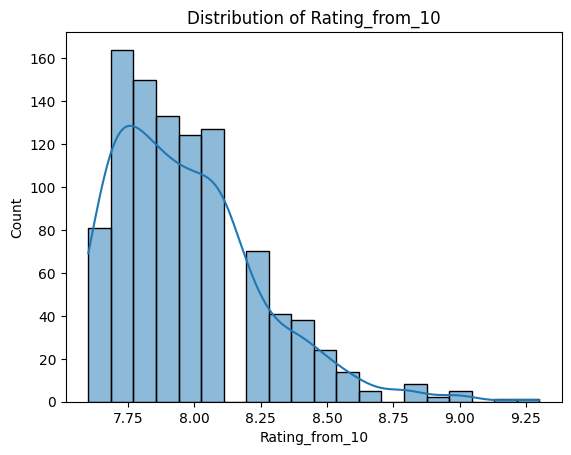

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Rating_from_10
sns.histplot(df["Rating_from_10"], bins=20, kde=True)
plt.title("Distribution of Rating_from_10")
plt.show()

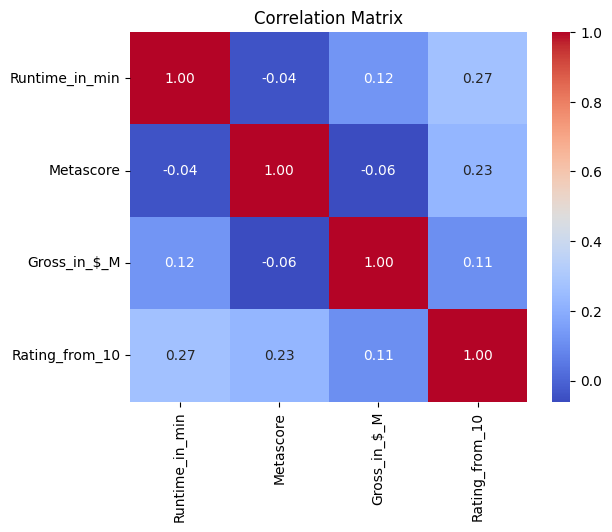

In [38]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

features = ['Metascore', 'Gross_in_$_M']
X=df[features]
y=df['Rating_from_10']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Mean squared error is : {mse}")


Mean squared error is : 0.07153244747688597


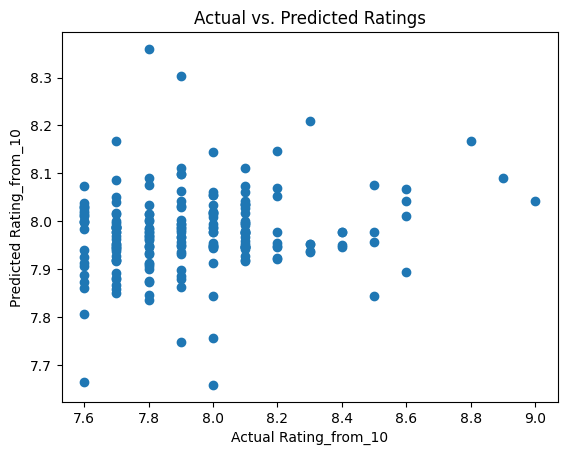

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating_from_10")
plt.ylabel("Predicted Rating_from_10")
plt.title("Actual vs. Predicted Ratings")
plt.show()

In [43]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("Coefficient Matrix:")
print(coefficients)

print(f"Intercept: {model.intercept_}")

Coefficient Matrix:
        Feature  Coefficient
0     Metascore     0.006292
1  Gross_in_$_M     0.000433
Intercept: 7.451315682577399
